In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
%matplotlib inline
df_all = pd.read_csv('./data_flag.csv')
df_all = df_all.drop('Reference',axis=1)

In [7]:
df_all['Flag_TF'] = False 
df_all.loc[df_all.Flag!=0,'Flag_TF'] = True
df_all['Timestamp'] = df_all['Timestamp'].apply(lambda x: pd.to_datetime(x)) # str->
df_all['year'] = df_all['Timestamp'].apply(lambda x: x.year)
df_all['month'] = df_all['Timestamp'].apply(lambda x: x.month)
df_all['day'] = df_all['Timestamp'].apply(lambda x: x.day)
df_all['hour'] = df_all['Timestamp'].apply(lambda x: x.hour)

df_all.head()


,Depth,Latitude,Location,Longitude,Temperature,Timestamp,Flag,new_temp,Flag_TF,year,month,day,hour
0,15.0,33.4661,EagleRock,-118.5951,17.335,2004-06-26 07:00:00,0,17.335,False,2004.0,6.0,26.0,7.0
1,15.0,33.4661,EagleRock,-118.5951,18.215,2004-06-26 08:00:00,0,18.215,False,2004.0,6.0,26.0,8.0
2,15.0,33.4661,EagleRock,-118.5951,18.380,2004-06-26 09:00:00,0,18.380,False,2004.0,6.0,26.0,9.0
3,15.0,33.4661,EagleRock,-118.5951,18.460,2004-06-26 10:00:00,0,18.460,False,2004.0,6.0,26.0,10.0
4,15.0,33.4661,EagleRock,-118.5951,18.620,2004-06-26 11:00:00,0,18.620,False,2004.0,6.0,26.0,11.0


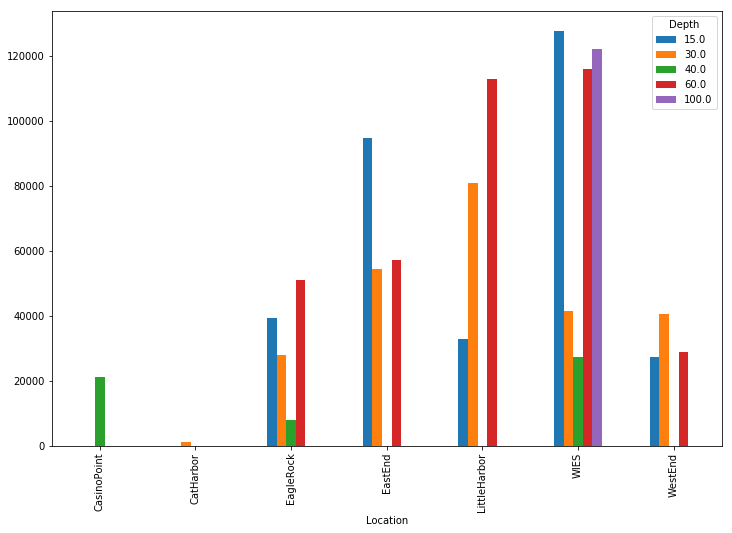

In [3]:
df_all.groupby(['Location','Depth']).size().unstack().plot(kind = "bar", width=0.5, figsize=(12,8))

In [4]:
### group stacked count
# can be grouped by location, depth, year
source_year = df_all.groupby(['year','Flag_TF']).size().unstack().fillna(0)
source_year.plot(kind='bar',stacked=True,color=['#e6550d','#fdae6b'],alpha=0.7,figsize = (12,8),title='bad data from each year')




KeyError: 'year'

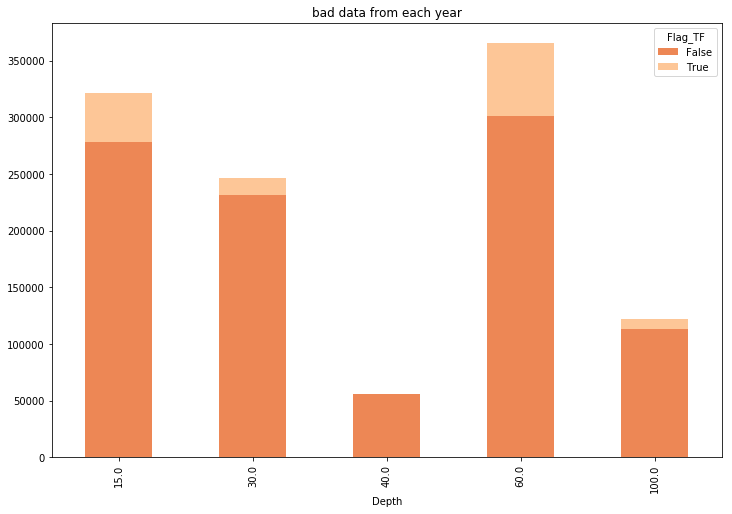

In [8]:
source_location = df_all.groupby(['Location','Flag_TF']).size().unstack().fillna(0)
source_location.plot(kind='bar',stacked=True,color=['#e6550d','#fdae6b'],alpha=0.7,figsize = (12,8),title='bad data from each year')



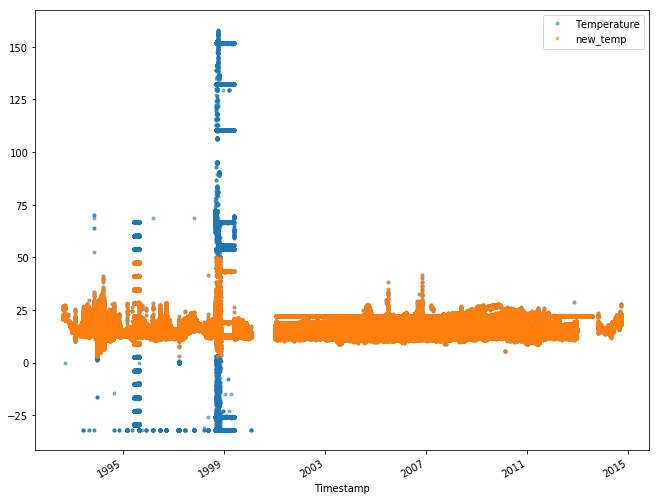

In [283]:
#### XXXXX

cols_plot=['Temperature','new_temp']
#final.loc[final.Flag==False]
axes = df_all.set_index('Timestamp')[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=False)

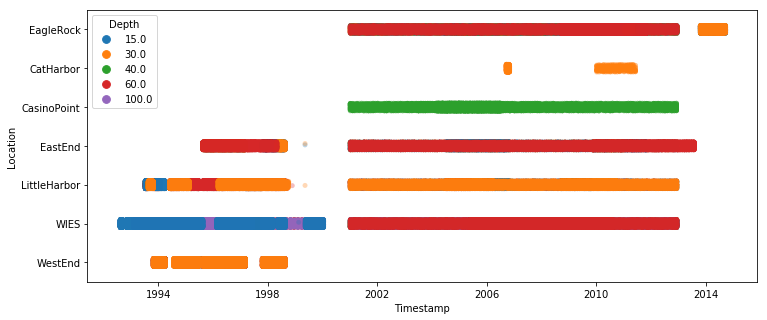

In [331]:
source = df_all[df_all.Flag_TF==False]

fig, ax = plt.subplots(figsize=(12,5))

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.catplot(ax=ax,x="Timestamp", y="Location",hue="Depth", data=source,alpha=0.3,legend_out=True); #,kind="swarm"
plt.close(2)
# extra empty plot
# https://stackoverflow.com/questions/54959764/seaborn-factorplot-generates-extra-empty-plots-below-actual-plot



In [1]:
source = df_all[df_all.Flag_TF==False]



NameError: name 'df_all' is not defined

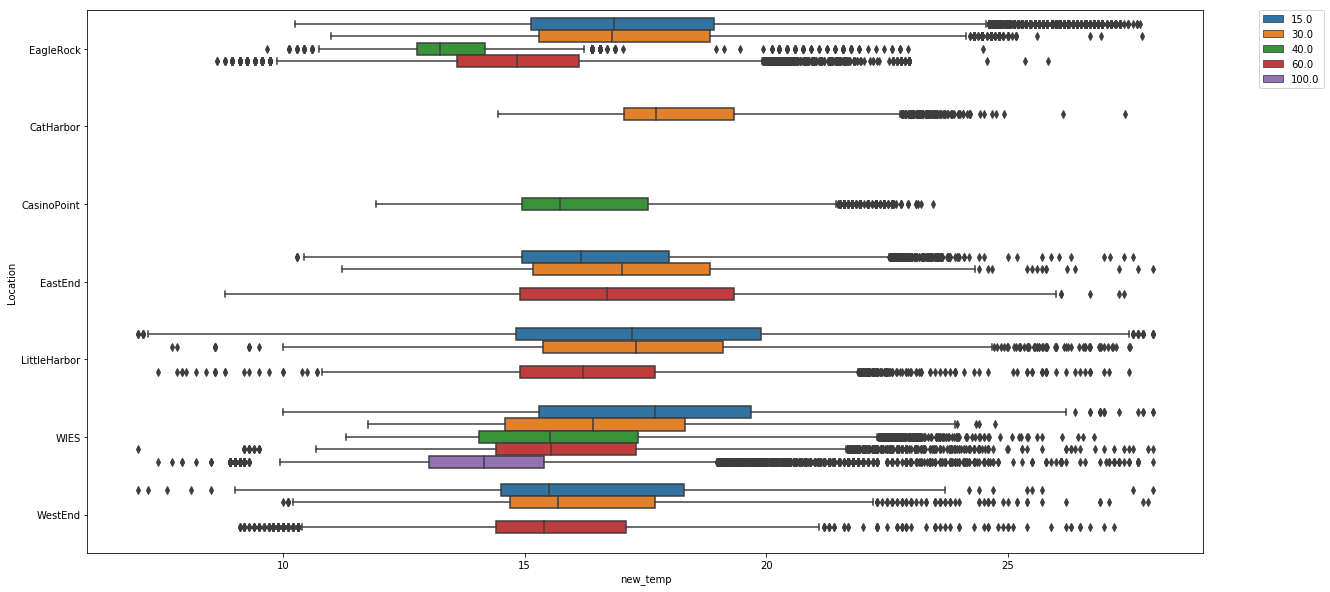

In [18]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="new_temp", y="Location", hue="Depth", data=df_all[df_all.Flag_TF==False])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [22]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns


def plot_year_wise_location_wise_temp(required_dataframe,location,year):
    #required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)][['new_temp','year','month','day','hour']]
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title((" Hourly avg temperature at "+location + ' in ' + str(year)))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #plt.ylim(12,15)
    ax.set_xticks(range(0, 24, 1))
    required_dataframe.groupby(['hour','month'])['new_temp'].mean().unstack().plot(ax=ax,cmap="Paired")

def heatmap_data_density(required_dataframe):
    #required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)][['new_temp','year','month','day','hour']]
    test = required_dataframe.groupby(['month','hour'])['new_temp'].count().unstack()
    fig2, ax2=plt.subplots(figsize=(12,5))
    #plt.ylabel("month")
    mask = pd.DataFrame(columns = range(23,-1,-1),index=range(1,13)).fillna(0)
    sns.heatmap(mask+test, cmap="Purples", vmin=0, vmax=200,center=1,linewidths=0.1, linecolor='white', annot=True, fmt="d")
    
    
def plotting(year,location,depth):
    required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)& (df_all['Depth'] == depth)][['new_temp','year','month','day','hour']]
    plot_year_wise_location_wise_temp(required_dataframe,location,year)   
    heatmap_data_density(required_dataframe)

location_list = df_all.Location.unique()
year_range = (1992,2014)
depth_list = df_all.Depth.unique()
interactive_plot = interactive(plotting, location=location_list, year=year_range,depth=depth_list)
output = interactive_plot.children[-1]
interactive_plot
## not able to move the legend while using ipywidgets

interactive(children=(IntSlider(value=2003, description='year', max=2014, min=1992), Dropdown(description='loc…

In [24]:
year = 2003
location = 'EagleRock'
depth=15
required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)& (df_all['Depth'] == depth)][['new_temp','year','month','day','hour']]

In [343]:
year=1998
location='WIES'
depth=15
required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)& (df_all['Depth'] == depth)][['new_temp','year','month','day','hour']]

required_dataframe

,new_temp,year,month,day,hour
998461,16.6,1998.0,1.0,1.0,23.0
998462,16.6,1998.0,1.0,1.0,0.0
998463,16.6,1998.0,1.0,1.0,1.0
998464,16.6,1998.0,1.0,1.0,2.0
998465,16.5,1998.0,1.0,1.0,3.0
998466,16.5,1998.0,1.0,1.0,4.0
998467,16.5,1998.0,1.0,1.0,5.0
998468,16.5,1998.0,1.0,1.0,6.0
998469,16.5,1998.0,1.0,1.0,7.0
998470,16.5,1998.0,1.0,1.0,8.0


In [344]:
required_dataframe.month.unique()

array([ 1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
def heatmap_data_density(year,location):
    required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)][['new_temp','year','month','day','hour']]
    test = required_dataframe.groupby(['hour','month'])['new_temp'].count().unstack()
    plt.subplots(figsize=(6,6))
    mask = pd.DataFrame(index = range(23,-1,-1),columns=range(1,13)).fillna(0)
    sns.heatmap(mask+test, cmap="Purples", vmin=0, vmax=200,center=1)
    #linewidths=0.1, linecolor='white',annot=True



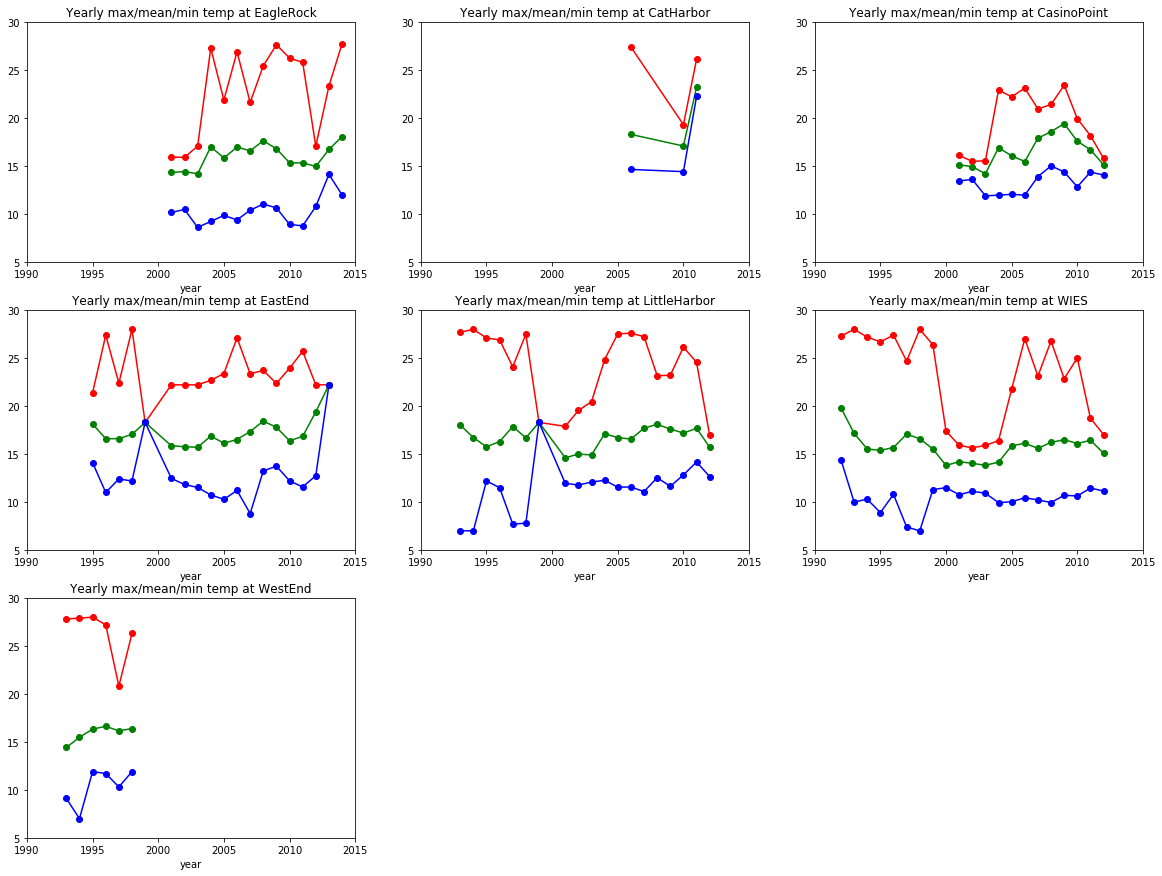

In [329]:
# Maximum temperature at every location for every year
required =df_all[df_all['Flag_TF']==False]
row = 3;col = 3;plot = 1
locations = list(required["Location"].unique())
plt.figure(figsize=(20,15))

for l in locations:
    plt.subplot(row,col,plot)
    plt.title(("Yearly max/mean/min temp at "+l))
    plt.ylim(5,30)
    plt.xlim(1990,2015)
    ax = required[required["Location"]==l]["new_temp"].groupby(required["year"]).max().plot(color='red',marker='o', linestyle='-')
    ax = required[required["Location"]==l]["new_temp"].groupby(required["year"]).mean().plot(color='green',marker='o', linestyle='-')
    ax = required[required["Location"]==l]["new_temp"].groupby(required["year"]).min().plot(color='blue',marker='o', linestyle='-')
    plot += 1

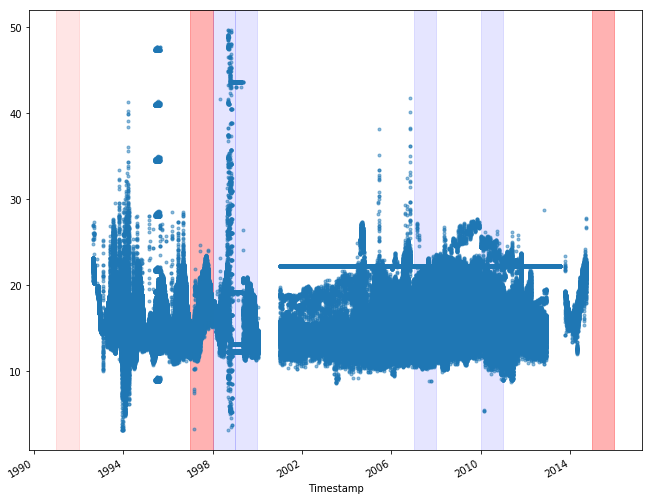

In [16]:
#### XXXXX

axes = df_all.set_index('Timestamp')['new_temp'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=False)
#very strong El nino

plt.axvspan('1997', '1998', color='red', alpha=0.3)
plt.axvspan('2015', '2016', color='red', alpha=0.3)

# strong El nino
plt.axvspan('1991', '1992', color='red', alpha=0.1)

# strong La nina
plt.axvspan('1998', '1999', color='blue', alpha=0.1)
plt.axvspan('1999', '2000', color='blue', alpha=0.1)
plt.axvspan('2007', '2008', color='blue', alpha=0.1)
plt.axvspan('2010', '2011', color='blue', alpha=0.1)


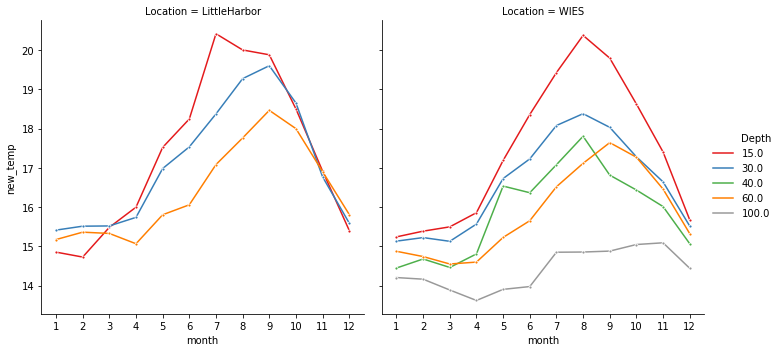

In [107]:
source = df_all[df_all.Flag_TF==False]
compare_WIES_LH = source[source.Location.isin(["WIES","LittleHarbor"])]

ax = sns.relplot(x="month", y="new_temp",
            hue="Depth", col="Location",
            kind="line", legend="full", data=compare_WIES_LH,palette="Set1",marker='.',ci=None)#line_kws={"s": 100})
ax.set(xticks=range(1,13 , 1))



#plt.tick_params(axis='month', colors='red', direction='out', length=13, width=3)
#ax = source[source["Location"]=='WIES'].groupby(["month",'Depth'])["new_temp"].mean().unstack().plot(marker='o', linestyle='-')



In [108]:
def heatmap_data_density(year,location):
    required_dataframe = df_all.loc[(df_all['year']==year) & (df_all['Location'] == location)][['new_temp','year','month','day','hour']]
    test = required_dataframe.groupby(['hour','month'])['new_temp'].count().unstack()
    plt.subplots(figsize=(6,6))
    mask = pd.DataFrame(index = range(23,-1,-1),columns=range(1,13)).fillna(0)
    sns.heatmap(mask+test, cmap="Purples", vmin=0, vmax=200,center=1)
    #linewidths=0.1, linecolor='white',annot=True

def tryying(year):
    temp = compare_WIES_LH[compare_WIES_LH.year==year]
    ax = sns.relplot(x="month", y="new_temp",
                hue="Depth", col="Location",
                kind="line", legend="full", data=temp,palette="Set1",marker='.',ci=None)#line_kws={"s": 100})
    ax.set(xticks=range(1,13 , 1))

year_range = (1992,2014)
interactive_plot = interactive(tryying, year=year_range)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=2003, description='year', max=2014, min=1992), Output()), _dom_classes=(…

<Figure size 0x360 with 0 Axes>